<a href="https://colab.research.google.com/github/CNIU1997/BA_888/blob/master/BA888_siqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving test_data.csv to test_data.csv


In [0]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np
train = pd.read_csv('train_data.csv',index_col=0)
train = train.iloc[:-2].drop(['X1','PRICE_VAR','year'],axis=1)
train.dropna(subset=['Class'],inplace=True)
train = train[train.Sector != 'X1']
train = train[train.Sector != 'TRUE']
train = pd.get_dummies(train, columns=['Sector'])
cols = train.select_dtypes(exclude=['float']).columns
train[cols] = train[cols].apply(pd.to_numeric, downcast='float', errors='coerce')
cols=["PB_ratio","PTB_ratio","priceToSalesRatio","PE_ratio","PFCF_ratio","POCF_ratio","ROE","payablesTurnover","inventoryTurnover",
"daysOfPayablesOutstanding","debtRatio","debtEquityRatio","interestCoverage","operatingCashFlowPerShare","freeCashFlowPerShare",
"cashPerShare","payoutRatio","Consolidated_Income","EPS_Diluted","Return_on_Tangible_Assets","ROIC","Days_of_Inventory_on_Hand",
"cashFlowCoverageRatios","EPS_Diluted_Growth","Weighted_Average_Shs_Out_(Dil)","Weighted_Average_Shares_Diluted_Growth"]
train.drop(cols,axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,224,225,226) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, comp

In [0]:
test = pd.read_csv('test_data.csv',index_col=0)
test = test.iloc[:-2].drop(['X1','PRICE_VAR','year'],axis=1)
test.dropna(subset=['Class'],inplace=True)
test = test[test.Sector != 'X1']
test = test[test.Sector != 'TRUE']
test = pd.get_dummies(test, columns=['Sector'])
cols1 = test.select_dtypes(exclude=['float']).columns
test[cols1] = test[cols1].apply(pd.to_numeric, downcast='float', errors='coerce')
# Match the columns in the dataframes
cols=["PB_ratio","PTB_ratio","priceToSalesRatio","PE_ratio","PFCF_ratio","POCF_ratio","ROE","payablesTurnover","inventoryTurnover",
"daysOfPayablesOutstanding","debtRatio","debtEquityRatio","interestCoverage","operatingCashFlowPerShare","freeCashFlowPerShare",
"cashPerShare","payoutRatio","Consolidated_Income","EPS_Diluted","Return_on_Tangible_Assets","ROIC","Days_of_Inventory_on_Hand",
"cashFlowCoverageRatios","EPS_Diluted_Growth","Weighted_Average_Shs_Out_(Dil)","Weighted_Average_Shares_Diluted_Growth"]
test.drop(cols,axis=1,inplace=True)
train, test = train.align(test, join = 'inner', axis = 1)

In [0]:
train = (train
     .pipe(lambda df: df.loc[:, df.dtypes.values != np.dtype('O')])) # drop str columns
test = (test
     .pipe(lambda df: df.loc[:, df.dtypes.values != np.dtype('O')]))  # drop str columns

In [0]:
from scipy.stats.mstats import winsorize
## remove outliers 5% higher than the max and 5% lower than the min using for loop and winsorize
for col in train.columns: 
     train[col] = winsorize(train[col], limits=[0.05,0.05])
for col in test.columns: 
     test[col] = winsorize(test[col], limits=[0.05,0.05])

In [0]:
df=pd.concat([train,test],join="outer")

In [0]:
df_y=df['Class']
df_X=df.drop(['Class'],axis=1)

In [0]:
## balanced splited data
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size = 0.2,random_state=1234)

In [0]:
# y=train['Class']
# X1=train.drop(['Class'],axis=1)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # calculate mean and standard deviation of train set
scaler.fit(train_X)
X_scaled = scaler.transform(train_X) 
X = pd.DataFrame(X_scaled, index=train_X.index, columns=train_X.columns)

In [0]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(17660, 206)
(17660,)
(4415, 206)
(4415,)


In [0]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [0]:
# modeling 
import lightgbm as lgb
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [0]:
# utilities
from sklearn.model_selection import train_test_split
# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y1, valid_y = train_test_split(train_X, train_y, test_size = 0.2, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y1, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[21]	valid_0's auc: 0.680204	valid_0's binary_logloss: 0.644701
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[47]	valid_0's auc: 0.686661	valid_0's binary_logloss: 0.639413


In [0]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

,feature,importance
68,Effect_of_forex_changes_on_cash,23.0
65,Issuance_(buybacks)_of_shares,16.5
191,Book_Value_per_Share_Growth,16.5
90,effectiveTaxRate,16.0
164,Gross_Profit_Growth,13.0


In [0]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df


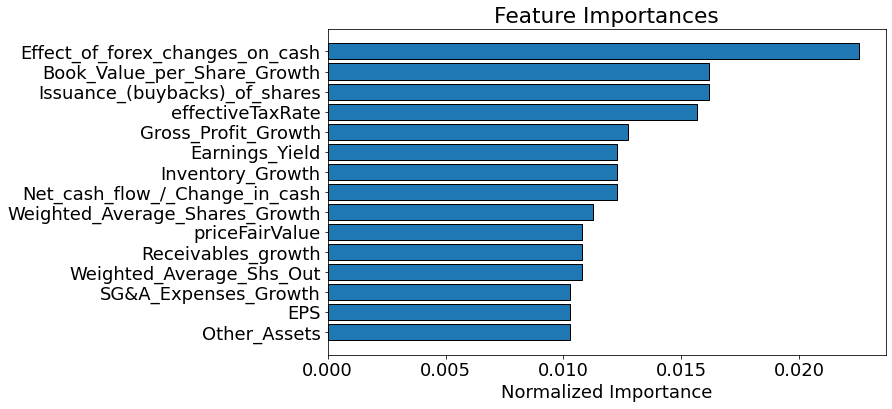

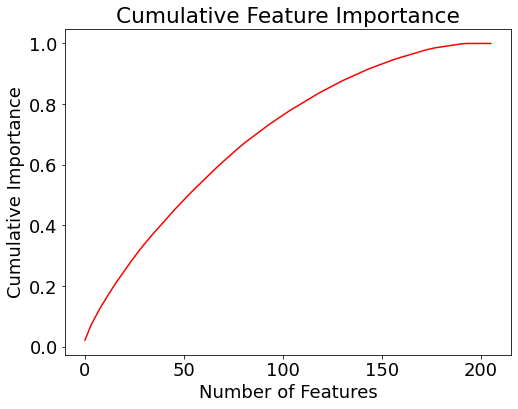

139 features required for 0.90 of cumulative importance


In [0]:
# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns
norm_feature_importance=plot_feature_importances(feature_importances)

In [0]:
cols=feature_importances[:15].feature
X_train = X[cols]
y_train=train_y

In [0]:
X_test=test_X[cols]
y_test=test_y
scaler2 = StandardScaler() # calculate mean and standard deviation of test set
scaler2.fit(X_test)
X_test = scaler2.transform(X_test)
# X = pd.DataFrame(X_scaled, index=X1.index, columns=X1.columns)


In [0]:
## rbf SVM
model=svm.SVC(kernel='rbf',random_state=0)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.6131370328425821


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

         0.0       0.60      0.36      0.45      1940
         1.0       0.62      0.81      0.70      2475

    accuracy                           0.61      4415
   macro avg       0.61      0.59      0.58      4415
weighted avg       0.61      0.61      0.59      4415



In [0]:
## logistic regression
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)
prediction2=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction2,y_test))

The accuracy of the Logistic Regression is 0.5984144960362401


In [0]:
## Decision Tree
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)
prediction3=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the Decision Tree is 0.5204983012457531


In [0]:
## KNN
model=KNeighborsClassifier() 
model.fit(X_train,y_train)
prediction4=model.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the KNN is 0.5805209513023782


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


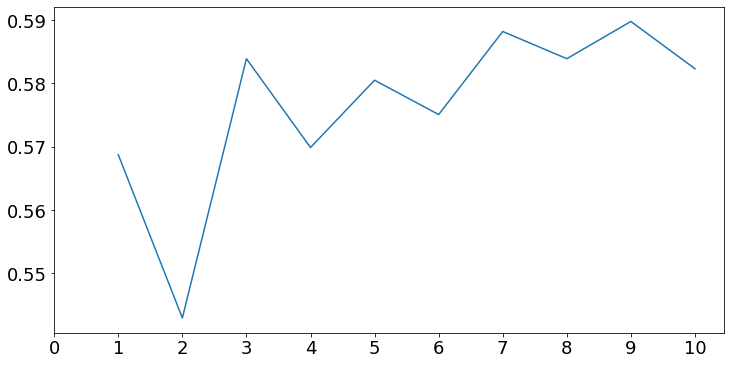

Accuracies for different values of n are: [0.56874292 0.54292186 0.58391846 0.56987542 0.58052095 0.57508494
 0.58822197 0.58391846 0.58980747 0.58233296] with the max value as  0.5898074745186863


In [0]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train,y_train)
    prediction=model.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [0]:
## NaiveBayes
model=GaussianNB()
model.fit(X_train,y_train)
prediction5=model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction5,y_test))

The accuracy of the NaiveBayes is 0.5966024915062288


In [0]:
## random forest
model=RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the Random Forests is 0.6052095130237826


In [0]:
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

         0.0       0.55      0.52      0.54      1940
         1.0       0.64      0.67      0.66      2475

    accuracy                           0.61      4415
   macro avg       0.60      0.60      0.60      4415
weighted avg       0.60      0.61      0.60      4415



In [0]:
## ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
# Instantiate the classfiers and make a list
classifiers = [svm.SVC(kernel='rbf', probability=True,random_state=0),
               LogisticRegression(random_state=0), 
               KNeighborsClassifier(n_neighbors=9),
               DecisionTreeClassifier(random_state=0),
               GaussianNB(), 
               RandomForestClassifier(random_state=0)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

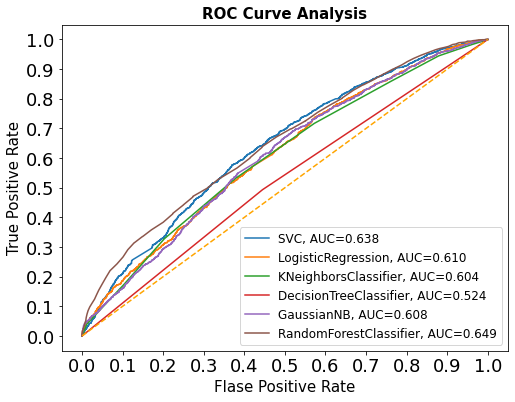

In [0]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()

In [0]:
## choose the 2 best classifers based on the AUC
## SVM
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3]
kernel=['rbf']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 165 out of 165 | elapsed: 39.9min finished


0.6053793884484711
SVC(C=0.6, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
## rbf SVM
model=svm.SVC(kernel='rbf',C=0.6,gamma=0.1,random_state=0)
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.6129105322763307


In [0]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

         0.0       0.60      0.36      0.45      1940
         1.0       0.62      0.81      0.70      2475

    accuracy                           0.61      4415
   macro avg       0.61      0.59      0.57      4415
weighted avg       0.61      0.61      0.59      4415



In [0]:
## random forest
from sklearn.model_selection import GridSearchCV
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 15.2min finished


0.6165911664779162
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


In [0]:
## random forest
model=RandomForestClassifier(n_estimators=800)
model.fit(X_train,y_train)
prediction6=model.predict(X_test)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction6,y_test))

The accuracy of the Random Forests is 0.6126840317100792


In [0]:
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

         0.0       0.56      0.55      0.56      1940
         1.0       0.65      0.66      0.66      2475

    accuracy                           0.61      4415
   macro avg       0.61      0.61      0.61      4415
weighted avg       0.61      0.61      0.61      4415



In [0]:
## ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
# Instantiate the classfiers and make a list
classifiers = [svm.SVC(kernel='rbf',C=0.6,gamma=0.1, probability=True,random_state=0),
               RandomForestClassifier(random_state=0,n_estimators=800)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

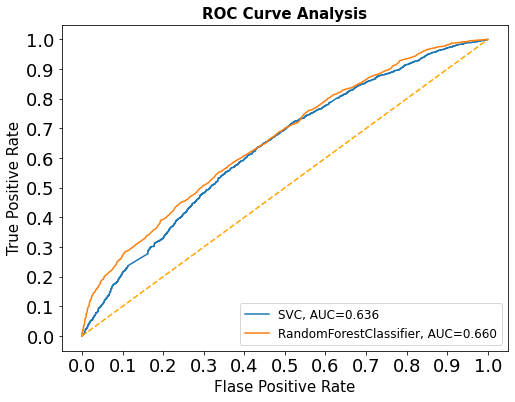

In [0]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()

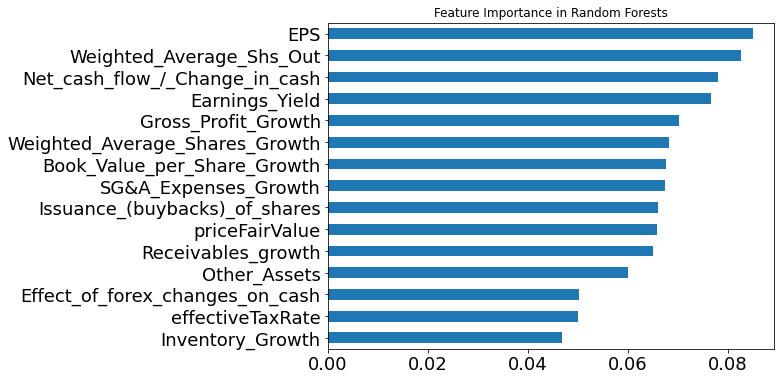

In [0]:
f=plt.figure(figsize=(8,6))
model=RandomForestClassifier(n_estimators=800,random_state=0)
model.fit(X_train,y_train)
feat_importances=pd.Series(model.feature_importances_,X_train.columns).sort_values(ascending=True)
feat_importances.plot(kind='barh')
plt.title('Feature Importance in Random Forests',fontsize=12)
plt.savefig('fi_rf.jpg',dpi=300,bbox_inches='tight')
# plt.show()
